In [118]:
import pandas as pd
import seaborn as sns

## Challenge 1

In [119]:
df_5_w1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190504.txt')
df_5_w2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190511.txt')
df_5_w3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190518.txt')
df_5_w4 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190525.txt')
df_6_w1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190601.txt')
df_6_w2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190608.txt')
df_5_w1.shape

(206857, 11)

In [120]:
df = pd.concat([df_5_w1, df_5_w2, df_5_w3, df_5_w4, df_6_w1, df_6_w2]).reset_index()
df.shape

(1231795, 12)

In [121]:
df.head()

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,00:00:00,REGULAR,7035249,2384833
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,04:00:00,REGULAR,7035269,2384840
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,08:00:00,REGULAR,7035292,2384875
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,12:00:00,REGULAR,7035392,2384951
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,16:00:00,REGULAR,7035651,2385020


## Challenge 2

In [122]:
#concat date and time columns

df['DATETIME'] = df['DATE'] + " " + df['TIME']
df['DATETIME'] = pd.to_datetime(df['DATETIME'])
df['DATE'] = pd.to_datetime(df['DATE'])
df['TIME'] = pd.to_datetime(df['TIME'])

df = df.drop(columns = 'index')
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               ',
       'DATETIME'],
      dtype='object')

## Challenge 3

group the data so that it represents daily entries for each turnstile, grouped by the combination of C/A, Unit, SCP, and Station

In [123]:
df_group = df.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATETIME']).agg('sum').reset_index()
#confirm no duplicate datetimes 
(df_group
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATETIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)
df_group

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,2019-04-27 00:00:00,7035249,2384833
1,A002,R051,02-00-00,59 ST,2019-04-27 04:00:00,7035269,2384840
2,A002,R051,02-00-00,59 ST,2019-04-27 08:00:00,7035292,2384875
3,A002,R051,02-00-00,59 ST,2019-04-27 12:00:00,7035392,2384951
4,A002,R051,02-00-00,59 ST,2019-04-27 16:00:00,7035651,2385020
...,...,...,...,...,...,...,...
1231778,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-06-05 17:00:00,5554,379
1231779,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-06-05 21:00:00,5554,379
1231780,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-06-06 01:00:00,5554,379
1231781,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-06-06 05:00:00,5554,379


In [124]:
df_daily = (df.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE'], as_index = False).ENTRIES.first())
df_daily

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,2019-04-27,7035249
1,A002,R051,02-00-00,59 ST,2019-04-28,7036100
2,A002,R051,02-00-00,59 ST,2019-04-29,7036746
3,A002,R051,02-00-00,59 ST,2019-04-30,7038242
4,A002,R051,02-00-00,59 ST,2019-05-01,7039729
...,...,...,...,...,...,...
203004,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-06-02,5554
203005,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-06-03,5554
203006,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-06-04,5554
203007,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-06-05,5554


In [125]:
df_daily[['PREV_DATE', 'PREV_ENTRIES']] = (df_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])['DATE', 'ENTRIES']
                                    .apply(lambda grp: grp.shift(1)))

<ipython-input-125-bc70613c2733>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_daily[['PREV_DATE', 'PREV_ENTRIES']] = (df_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])['DATE', 'ENTRIES']


In [126]:
print(df_daily.shape)
df_daily.dropna(subset = ['PREV_DATE'], axis = 0, inplace = True)
print(df_daily.shape)

(203009, 8)
(198127, 8)


In [127]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

In [128]:
df_daily['DAILY_ENTRIES'] = df_daily.apply(get_daily_counts, axis=1, max_counter=864000)
df_daily.head()

158 1087620.0
482 4317177.0
107 7245002.0
4050695 5903004.0
7246468 4050451.0
882 15418815.0
1435 4767402.0
335092671 3422305.0
412 3073070.0
161 4605408.0
681 6527713.0
569320813 4807409.0
279 9029146.0
65536 839317244.0
184608117 746094.0
80 2586370.0
238 2898346.0
50 1544092.0
607 3912014.0
196614 2998692.0
514 3755842.0
8 2020892.0
3003 6999467.0
408 8876564.0
1178879075 4471988.0
149 1252884.0
706 899109.0
4666 2201975.0
14 1327005.0
196633 68461839.0
200 36966261.0
1017 2357557.0
12 4887309.0
7 9441168.0
1058702 102390686.0
393355 1661809141.0
10 7602347.0
1463 1068632.0
29 6332751.0
30933207 6069289.0
71 7192933.0
115 12739117.0
1122 6546797.0
16779493 81157.0
637574909 2502854.0
231 637595004.0
68859156 436510383.0
607126914 594465.0
140397413 1577638340.0
458752 100663296.0
23 203977549.0
452993428 1830432.0
259 7480462.0
20 3000575.0
683737068 458752.0
905996437 3558247.0
0 5176463.0
7 13653544.0
182 10462950.0
2063649382 8123310.0
1129054878 2501599.0


,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,2019-04-28,7036100,2019-04-27,7035249.0,851.0
2,A002,R051,02-00-00,59 ST,2019-04-29,7036746,2019-04-28,7036100.0,646.0
3,A002,R051,02-00-00,59 ST,2019-04-30,7038242,2019-04-29,7036746.0,1496.0
4,A002,R051,02-00-00,59 ST,2019-05-01,7039729,2019-04-30,7038242.0,1487.0
5,A002,R051,02-00-00,59 ST,2019-05-02,7041303,2019-05-01,7039729.0,1574.0


In [129]:
weekday_ts = df_daily.drop(['PREV_DATE','PREV_ENTRIES', 'ENTRIES'], axis = 1)
weekday_ts.head()

,C/A,UNIT,SCP,STATION,DATE,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,2019-04-28,851.0
2,A002,R051,02-00-00,59 ST,2019-04-29,646.0
3,A002,R051,02-00-00,59 ST,2019-04-30,1496.0
4,A002,R051,02-00-00,59 ST,2019-05-01,1487.0
5,A002,R051,02-00-00,59 ST,2019-05-02,1574.0


In [130]:
weekday_ts['DATE_SHIFT'] = weekday_ts['DATE'] + pd.DateOffset(days=1)
weekday_ts['WEEKDAY'] = weekday_ts['DATE_SHIFT'].dt.day_name()
weekday_ts['WEEK'] = weekday_ts['DATE_SHIFT'].dt.week
weekday_ts.head()

<ipython-input-130-5fec1e4ed6b9>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  weekday_ts['WEEK'] = weekday_ts['DATE_SHIFT'].dt.week


,C/A,UNIT,SCP,STATION,DATE,DAILY_ENTRIES,DATE_SHIFT,WEEKDAY,WEEK
1,A002,R051,02-00-00,59 ST,2019-04-28,851.0,2019-04-29,Monday,18
2,A002,R051,02-00-00,59 ST,2019-04-29,646.0,2019-04-30,Tuesday,18
3,A002,R051,02-00-00,59 ST,2019-04-30,1496.0,2019-05-01,Wednesday,18
4,A002,R051,02-00-00,59 ST,2019-05-01,1487.0,2019-05-02,Thursday,18
5,A002,R051,02-00-00,59 ST,2019-05-02,1574.0,2019-05-03,Friday,18


In [131]:
ts_df_penn = weekday_ts[weekday_ts['STATION'] == '34 ST-PENN STA']

In [94]:
#ts_df_penn.groupby(['SCP', 'WEEK']).agg('mean').sort_values(by='DAILY_ENTRIES', ascending=False)

In [133]:
# # df_group = df.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATETIME']).agg('sum').reset_index()
ts_df_penn_wkmean = ts_df_penn.groupby(['STATION', 'SCP', 'WEEK']).agg('sum').reset_index()
ts_df_penn_wkmean.head()

,STATION,SCP,WEEK,DAILY_ENTRIES
0,34 ST-PENN STA,00-00-00,18,26752.0
1,34 ST-PENN STA,00-00-00,19,25678.0
2,34 ST-PENN STA,00-00-00,20,25472.0
3,34 ST-PENN STA,00-00-00,21,25611.0
4,34 ST-PENN STA,00-00-00,22,22818.0


In [158]:
ts_df_penn_wkmean = ts_df_penn_wkmean.groupby('SCP').agg('mean').sort_values(by='DAILY_ENTRIES', ascending=False).reset_index()
ts_df_penn_wkmean['AVG_WEEKLY_ENTRIES'] = ts_df_penn_wkmean['DAILY_ENTRIES']
ts_df_penn_wkmean = ts_df_penn_wkmean.drop(columns = ['WEEK', 'DAILY_ENTRIES'], errors='ignore')

ts_df_penn_wkmean.head()

,SCP,AVG_WEEKLY_ENTRIES
0,00-03-04,70306.0
1,00-00-04,53353.0
2,00-00-03,49053.0
3,00-00-01,46599.0
4,00-00-02,40522.0


In [135]:
ts_df_GCT = (weekday_ts[weekday_ts['STATION'] == 'GRD CNTRL-42 ST'])
#.sort_values(by='DAILY_ENTRIES', ascending = False)
ts_df_GCT.head()

,C/A,UNIT,SCP,STATION,DATE,DAILY_ENTRIES,DATE_SHIFT,WEEKDAY,WEEK
155902,R236,R045,00-00-00,GRD CNTRL-42 ST,2019-04-28,607.0,2019-04-29,Monday,18
155903,R236,R045,00-00-00,GRD CNTRL-42 ST,2019-04-29,309.0,2019-04-30,Tuesday,18
155904,R236,R045,00-00-00,GRD CNTRL-42 ST,2019-04-30,2124.0,2019-05-01,Wednesday,18
155905,R236,R045,00-00-00,GRD CNTRL-42 ST,2019-05-01,2194.0,2019-05-02,Thursday,18
155906,R236,R045,00-00-00,GRD CNTRL-42 ST,2019-05-02,2152.0,2019-05-03,Friday,18


In [136]:
ts_df_GCT_wkmean = ts_df_GCT.groupby(['STATION', 'SCP', 'WEEK']).agg('sum').reset_index()
ts_df_GCT_wkmean.head()

,STATION,SCP,WEEK,DAILY_ENTRIES
0,GRD CNTRL-42 ST,00-00-00,18,51900.0
1,GRD CNTRL-42 ST,00-00-00,19,50831.0
2,GRD CNTRL-42 ST,00-00-00,20,51502.0
3,GRD CNTRL-42 ST,00-00-00,21,50667.0
4,GRD CNTRL-42 ST,00-00-00,22,44412.0


In [153]:
ts_df_GCT_wkmean = ts_df_GCT_wkmean.groupby('SCP').agg('mean').sort_values(by='DAILY_ENTRIES', ascending=False).reset_index()
ts_df_GCT_wkmean['AVG_WEEKLY_ENTRIES'] = ts_df_GCT_wkmean['DAILY_ENTRIES']
ts_df_GCT_wkmean = ts_df_GCT_wkmean.drop(columns = ['WEEK', 'DAILY_ENTRIES'], errors='ignore')
ts_df_GCT_wkmean.head()

,SCP,AVG_WEEKLY_ENTRIES
0,00-00-01,55566.500000
1,02-00-04,49215.333333
2,00-00-00,48589.166667
3,02-00-03,42752.000000
4,02-03-01,39523.000000


In [138]:
ts_df_TIMESQ = (weekday_ts[weekday_ts['STATION'] == 'TIMES SQ-42 ST'])
#.sort_values(by='DAILY_ENTRIES', ascending = False)
ts_df_TIMESQ.head()

,C/A,UNIT,SCP,STATION,DATE,DAILY_ENTRIES,DATE_SHIFT,WEEKDAY,WEEK
2475,A021,R032,01-00-00,TIMES SQ-42 ST,2019-04-28,1190.0,2019-04-29,Monday,18
2476,A021,R032,01-00-00,TIMES SQ-42 ST,2019-04-29,1142.0,2019-04-30,Tuesday,18
2477,A021,R032,01-00-00,TIMES SQ-42 ST,2019-04-30,3590.0,2019-05-01,Wednesday,18
2478,A021,R032,01-00-00,TIMES SQ-42 ST,2019-05-01,3676.0,2019-05-02,Thursday,18
2479,A021,R032,01-00-00,TIMES SQ-42 ST,2019-05-02,3657.0,2019-05-03,Friday,18


In [139]:
ts_df_TIMESQ_wkmean = ts_df_TIMESQ.groupby(['STATION', 'SCP', 'WEEK']).agg('sum').reset_index()
ts_df_TIMESQ_wkmean.head()

,STATION,SCP,WEEK,DAILY_ENTRIES
0,TIMES SQ-42 ST,00-00-00,18,7456.0
1,TIMES SQ-42 ST,00-00-00,19,8719.0
2,TIMES SQ-42 ST,00-00-00,20,9754.0
3,TIMES SQ-42 ST,00-00-00,21,8005.0
4,TIMES SQ-42 ST,00-00-00,22,7144.0


In [156]:
ts_df_TIMESQ_wkmean = ts_df_TIMESQ_wkmean.groupby('SCP').agg('mean').sort_values(by='DAILY_ENTRIES', ascending=False).reset_index()
ts_df_TIMESQ_wkmean['AVG_WEEKLY_ENTRIES'] = ts_df_TIMESQ_wkmean['DAILY_ENTRIES']
ts_df_TIMESQ_wkmean = ts_df_TIMESQ_wkmean.drop(columns = ['WEEK', 'DAILY_ENTRIES'], errors='ignore')
ts_df_TIMESQ_wkmean.head()

,SCP,AVG_WEEKLY_ENTRIES
0,00-00-07,163036.166667
1,00-00-01,39750.833333
2,01-00-00,39461.166667
3,01-00-01,30491.666667
4,00-00-02,30179.666667


In [141]:
ts_df_34HERALD = (weekday_ts[weekday_ts['STATION'] == '34 ST-HERALD SQ']).sort_values(by='DAILY_ENTRIES', ascending = False)
ts_df_34HERALD.head()

,C/A,UNIT,SCP,STATION,DATE,DAILY_ENTRIES,DATE_SHIFT,WEEKDAY,WEEK
2913,A022,R022,01-00-02,34 ST-HERALD SQ,2019-05-16,6212.0,2019-05-17,Friday,20
2851,A022,R022,01-00-00,34 ST-HERALD SQ,2019-06-07,6108.0,2019-06-08,Saturday,23
96889,N506,R022,00-05-05,34 ST-HERALD SQ,2019-06-01,6059.0,2019-06-02,Sunday,22
96301,N505,R022,02-06-01,34 ST-HERALD SQ,2019-06-01,6039.0,2019-06-02,Sunday,22
96895,N506,R022,00-05-05,34 ST-HERALD SQ,2019-06-07,6005.0,2019-06-08,Saturday,23


In [142]:
ts_df_34HERALD_wkmean = ts_df_34HERALD.groupby(['STATION', 'SCP', 'WEEK']).agg('sum').reset_index()
ts_df_34HERALD_wkmean.head()

,STATION,SCP,WEEK,DAILY_ENTRIES
0,34 ST-HERALD SQ,00-00-00,18,20361.0
1,34 ST-HERALD SQ,00-00-00,19,20456.0
2,34 ST-HERALD SQ,00-00-00,20,19622.0
3,34 ST-HERALD SQ,00-00-00,21,19830.0
4,34 ST-HERALD SQ,00-00-00,22,19418.0


In [157]:
ts_df_34HERALD_wkmean = ts_df_34HERALD_wkmean.groupby('C/A','SCP').agg('mean').sort_values(by='DAILY_ENTRIES', ascending=False).reset_index()
ts_df_34HERALD_wkmean['AVG_WEEKLY_ENTRIES'] = ts_df_34HERALD_wkmean['DAILY_ENTRIES']
ts_df_34HERALD_wkmean = ts_df_34HERALD_wkmean.drop(columns = ['WEEK', 'DAILY_ENTRIES'], errors='ignore')
ts_df_34HERALD_wkmean.head()

,SCP,AVG_WEEKLY_ENTRIES
0,01-00-02,52681.333333
1,01-00-01,50177.333333
2,01-00-00,48545.333333
3,00-05-05,34448.666667
4,00-05-04,29471.166667


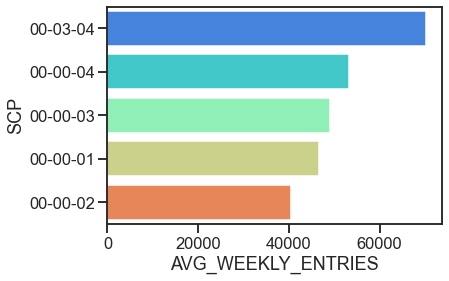

In [169]:
sns.set_context('talk')
sns.set_style('ticks')
g = sns.barplot(data = ts_df_penn_wkmean.head(), y = 'SCP', x = 'AVG_WEEKLY_ENTRIES', palette = 'rainbow')

#g.set_title('Turnstiles: 34th St Penn Station - Highest Weekly Average')
g.figure.savefig('top_5_ts_penn.png', bbox_inches='tight')

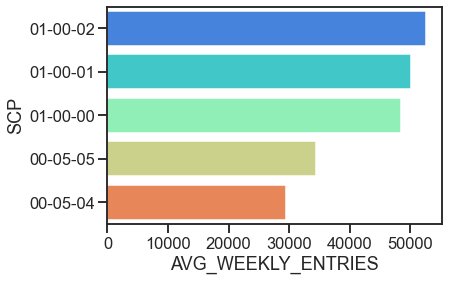

In [170]:
sns.set_context('talk')
sns.set_style('ticks')
g = sns.barplot(data = ts_df_34HERALD_wkmean.head(), y = 'SCP', x = 'AVG_WEEKLY_ENTRIES', palette = 'rainbow')

#g.set_title('Turnstiles: 34th St Herald Square - Highest Weekly Average')
g.figure.savefig('top_5_ts_34herald.png', bbox_inches='tight')

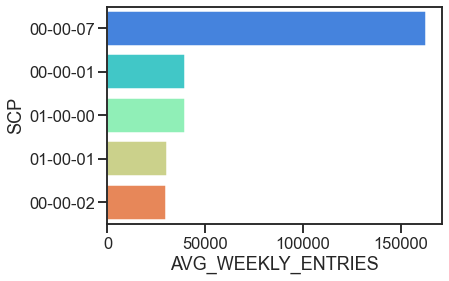

In [171]:
sns.set_context('talk')
sns.set_style('ticks')
g = sns.barplot(data = ts_df_TIMESQ_wkmean.head(), y = 'SCP', x = 'AVG_WEEKLY_ENTRIES', palette = 'rainbow')

#g.set_title('Turnstiles: Times Square 42nd St - Highest Weekly Average')
g.figure.savefig('top_5_ts_TIMESQ.png', bbox_inches='tight')

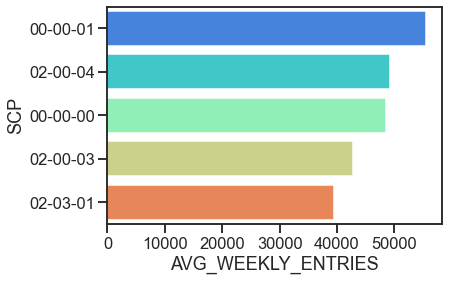

In [172]:

sns.set_context('talk')
sns.set_style('ticks')
g = sns.barplot(data = ts_df_GCT_wkmean.head(), y = 'SCP', x = 'AVG_WEEKLY_ENTRIES', palette = 'rainbow')

#g.set_title('Grand Central Station - 42nd St Turnstiles - Highest Weekly Average')
g.figure.savefig('top_5_ts_GCT.png', bbox_inches='tight')

## Challenge 4
plot daily time series for a single turnstile

In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

In [60]:
single_turn = df_daily[(df_daily['C/A'] == 'R236') & (df_daily['UNIT'] == 'R045') & 
                       (df_daily['SCP'] == '00-00-00') & (df_daily['STATION'] == 'GRD CNTRL-42 ST')]

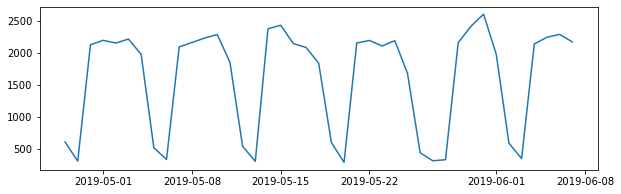

In [66]:
plt.figure(figsize=(10,3))
plt.plot(single_turn['DATE'],single_turn['DAILY_ENTRIES'])

In [63]:
df_group[df_group.STATION == 'GRD CNTRL-42 ST'].UNIT.unique()

array(['R045', 'R046', 'R047', 'R048'], dtype=object)

In [64]:
df_group[df_group.STATION == 'GRD CNTRL-42 ST']['C/A'].unique()

array(['R236', 'R237', 'R237B', 'R238', 'R238A', 'R240', 'R241A'],
      dtype=object)

In [65]:
df_group[df_group.STATION == 'GRD CNTRL-42 ST'].SCP.unique()

array(['00-00-00', '00-00-01', '00-00-02', '00-00-03', '00-00-04',
       '00-00-05', '00-03-00', '00-03-01', '00-03-02', '00-03-03',
       '00-06-00', '00-06-01', '01-00-00', '01-00-01', '01-00-02',
       '01-00-03', '01-00-04', '01-00-05', '01-00-06', '00-00-06',
       '00-00-07', '00-03-04', '00-05-00', '00-05-01', '00-06-02',
       '02-00-00', '02-00-01', '02-00-02', '02-00-03', '02-00-04',
       '02-03-00', '02-03-01', '02-03-02', '00-03-05', '00-03-06',
       '00-03-07', '00-03-08'], dtype=object)

## Challenge 5

Same value for C/A, Unit, Station columns, different values for SCP column

We want to combine numbers together, for each CA/Unit/Station combo, for each day, sum the counts from each turnstile belonging to that combo.

In [75]:
df_c5 = df_daily.groupby(['C/A', 'UNIT', 'STATION', 'DATE']).agg({'DAILY_ENTRIES': 'sum', 'PREV_ENTRIES': 'sum', 
                                                                  'ENTRIES': 'sum'}).reset_index()

In [76]:
df_c5.head()

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES,PREV_ENTRIES,ENTRIES
0,A002,R051,59 ST,2019-04-28,8394.0,55109712.0,55118106
1,A002,R051,59 ST,2019-04-29,6337.0,55118106.0,55124443
2,A002,R051,59 ST,2019-04-30,13132.0,55124443.0,55137575
3,A002,R051,59 ST,2019-05-01,13664.0,55137575.0,55151239
4,A002,R051,59 ST,2019-05-02,13748.0,55151239.0,55164987


## Challenge 6

Combine everything in each station, come up with daily time series for each station, by adding up all the turnstiles in a station.

In [78]:
df_c6 = df_daily.groupby(['STATION', 'DATE']).agg({'DAILY_ENTRIES': 'sum', 'PREV_ENTRIES': 'sum', 
                                                                  'ENTRIES': 'sum'}).reset_index()

In [79]:
df_c6.head()

,STATION,DATE,DAILY_ENTRIES,PREV_ENTRIES,ENTRIES
0,1 AV,2019-04-28,6338.0,1.413315e+09,1413321232
1,1 AV,2019-04-29,4555.0,1.413321e+09,1413325787
2,1 AV,2019-04-30,18018.0,1.413326e+09,1413343805
3,1 AV,2019-05-01,18923.0,1.413344e+09,1413362728
4,1 AV,2019-05-02,19226.0,1.413363e+09,1413381954


For presentation: find top three stations, and then their top five turnstiles

In [ ]:
top_stations_mask = 

## Challenge 7
Plot the daily time series for a station

In [89]:
df_c6_bb = df_c6[df_c6.STATION == 'BROOKLYN BRIDGE'].reset_index()
df_c6_bb.shape

(41, 6)

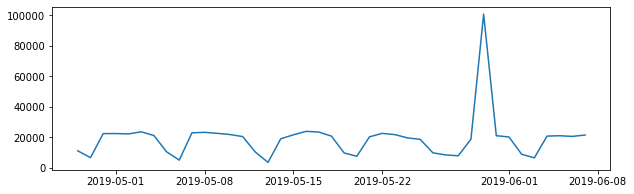

In [83]:
plt.figure(figsize=(10,3))
plt.plot(df_c6_bb['DATE'],df_c6_bb['DAILY_ENTRIES'])
#plt.xticks(['2019-05-12', '2019-05-13', '2019-05-14', '2019-05-15', '2019-05-16'])
#plt.xlim(['2019-05-27', '2019-06-05'])
#plt.ylim([0.1e10,1e10])

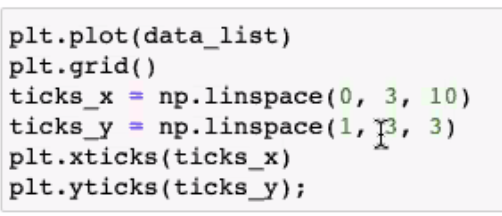

## Challenge 8
Make one list of counts for one week of one station. plot your week count list for every week count list you create.  You should get a rainbow plot of weekly commute numbers on top of each other.


In [148]:
weekday = df_c6_bb.drop(['PREV_ENTRIES', 'ENTRIES', 'index'], axis = 1)

In [149]:
weekday.head()

,STATION,DATE,DAILY_ENTRIES
0,BROOKLYN BRIDGE,2019-04-28,11143.0
1,BROOKLYN BRIDGE,2019-04-29,6712.0
2,BROOKLYN BRIDGE,2019-04-30,22427.0
3,BROOKLYN BRIDGE,2019-05-01,22469.0
4,BROOKLYN BRIDGE,2019-05-02,22231.0


In [165]:
weekday['WEEKDAY'] = weekday['DATE'].dt.day_name()
weekday['WEEK'] = weekday['DATE'].dt.week
weekday.head()

,STATION,DATE,DAILY_ENTRIES,WEEKDAY,WEEK
0,BROOKLYN BRIDGE,2019-04-28,11143.0,Sunday,17
1,BROOKLYN BRIDGE,2019-04-29,6712.0,Monday,18
2,BROOKLYN BRIDGE,2019-04-30,22427.0,Tuesday,18
3,BROOKLYN BRIDGE,2019-05-01,22469.0,Wednesday,18
4,BROOKLYN BRIDGE,2019-05-02,22231.0,Thursday,18


Top 3 stations, Top 5 turnstiles